<a href="https://colab.research.google.com/github/giyuntf2/1day1commit/blob/main/doit_algo/3%EC%9E%A5_%EA%B2%80%EC%83%89_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 검색 알고리즘

데이터 집합에서 원하는 값을 가진 원소를 찾아내는 검색 알고리즘

## 검색하는 법

1. 배열 검색
2. 연결 리스트 검색
3. 이진 검색 트리 검색

### 배열 검색

- 선형 검색 : 무작위로 늘어놓은 데이터 집합에서 검색을 수행합니다.

- 이진 검색 : 일정한 규칙으로 늘어놓은 데이터 집합에서 아주 빠른 검색을 수행합니다.

- 해시법 : 추가 및 삭제가 자주 일어나는 데이터 집합에서 아주 빠른 검색을 수행합니다.

    - 체인법 : 같은 해시값 데이터를 연결 리스트로 연결하는 방법입니다.

    - 오픈 주소법 : 데이터를 위한 해시값이 충돌할 때 재해시(Re-Hashing) 하는 방법입니다.

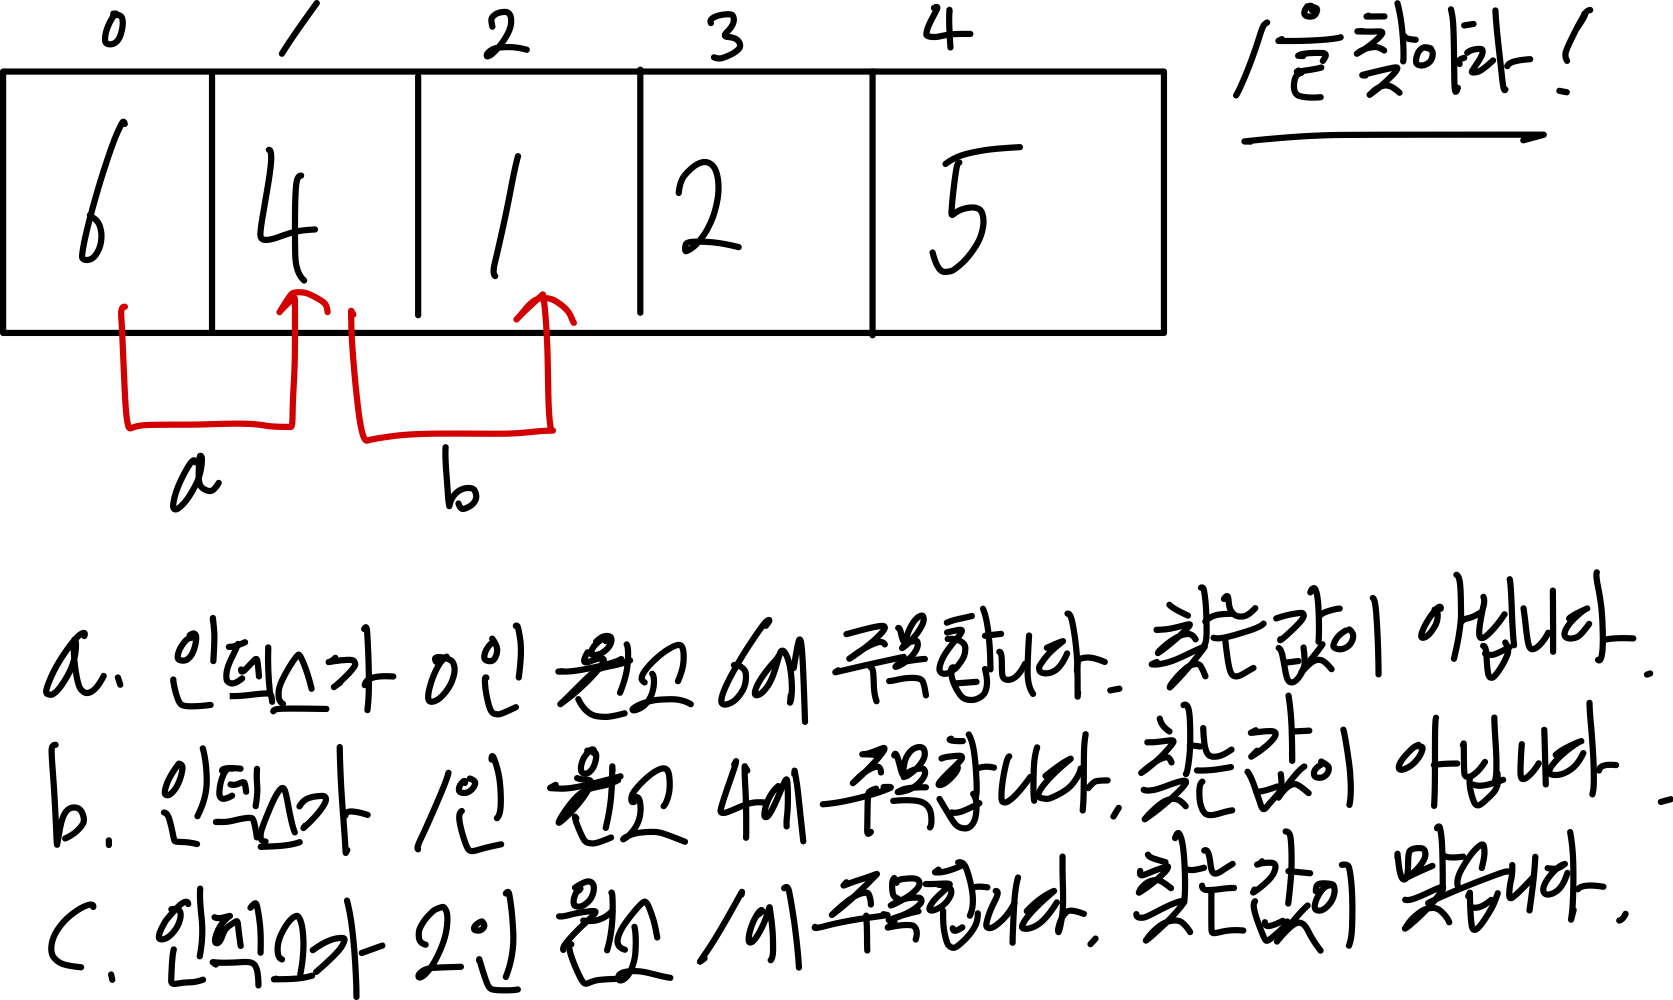




### 선형 검색의 종료 조건
1. 검색할 값을 찾지 못하고 배열의 맨 끝을 지나간 경우

2. 검색할 값과 같은 원소를 찾는 경우


In [ ]:
import time
from functools import wraps

def check_time(function):
	@wraps(function)
	def measure(*args, **kwargs):
		start_time = time.time()
		result = function(*args, **kwargs)
		end_time = time.time()
		print(f"@check_time: {function.__name__} took {end_time - start_time}")
		return result

	return measure

In [ ]:
a = [6,4,2,1,4,6,7,8,9,1,2,3,32,2]
key = 32

In [ ]:
@check_time
def seq_search(a, key):
    i = 0
    while True:
        if a[i] == key:
            return i

        elif i == len(a):
            return -1

        i += 1

In [ ]:
seq_search(a, key)

@check_time: seq_search took 7.3909759521484375e-06


12

In [ ]:
@check_time
def seq_search1(a, key):
    for idx, value in enumerate(a):
        if value == key:
            return idx 
    return -1

In [ ]:
seq_search1(a, key)

@check_time: seq_search1 took 5.4836273193359375e-06


12

# 이진 검색

이진 검색을 알아보자. 이진 검색 알고리즘을 사용하려면 ***배열의 데이터가 정렬(sort)***되어 있어야 한다.



In [ ]:
from typing import Any, Sequence

def bin_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 일치하는 원소를 이진 검색(실행 과정을 출력)"""
    pl = 0           # 검색 범위 맨 앞 원소의 인덱스
    pr = len(a) - 1  # 검색 범위 맨 끝 원소의 인덱스

    print('   |', end='')
    for i in range(len(a)):
        print(f'{i : 4}', end='')
    print()
    print('---+' + (4 * len(a) + 2) * '-')

    while True:
        pc = (pl + pr) // 2  # 중앙 원소의 인덱스

        print('   |', end='')
        if pl != pc:         # pl 원소 위에 <-를 출력
            print((pl * 4 + 1) * ' ' + '<-' + ((pc - pl) * 4) * ' ' + '+', end='')
        else: 
            print((pc * 4 + 1) * ' ' + '<+', end='')
        if pc != pr:         # pr 원소 위에 ->를 출력
            print(((pr - pc) * 4 - 2) * ' ' + '->')
        else:
            print('->')
        print(f'{pc:3}|', end='')
        for i in range(len(a)):
            print(f'{a[i]:4}', end='') 
        print('\n   |')

        if a[pc] == key:
            return pc    # 검색 성공
        elif a[pc] < key:
            pl = pc + 1  # 검색 범위를 뒤쪽의 절반으로 좁힘
        else:
            pr = pc - 1  # 검색 범위를 앞쪽의 절반으로 좁힘
        if pl > pr:  
            break
    return -1            # 검색 실패

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    print('배열 데이터를 오름차순으로 입력하세요.')

    x[0] = int(input('x[0]: '))

    for i in range(1, num):
        while True:
            x[i] = int(input(f'x[{i}]: '))
            if x[i] >= x[i - 1]:
                 break

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 ky를 입력

    idx = bin_search(x, ky)                     # ky와 같은 값의 원소를 x에서 검색

    if idx == -1:
        print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

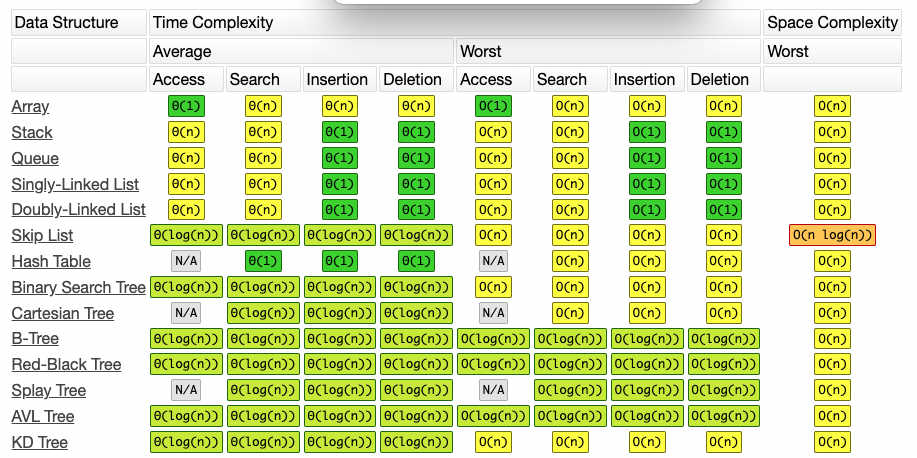

# 해시법

- 해시법은 '데이터를 저장할 위치 = 인덱스'를 간단한 연산으로 구하는 것을 말한다. 이 방법은 원소의 검색뿐만 아니라, 삭제-추가도 효율적으로 수행이 가능하다.

# Hash_Table
1. 해쉬 구조
- Hash_table : key에 Value를 저장하는 데이터 구조
    - Key를 통해 바로 데이터를 받아올 수 있으므로, 속도가 매우 빠름. (Search : O(1))
    - 파이썬 딕셔너리 타입이 해쉬 테이블의 예시
    - 보통 배열로 미리 Hash Table 사이즈만큼 생성 후에 사용. (공간과 탐색 시간을 맞바꾸는 기법)

2. 용어 정리
- Hash : 임의 값을 고정 길이로 변환하는 것
- Hash Table : Key 값의 연산에 의해 직접 접근이 가능한 데이터 구조
- Hashing Function : Key에 대해 산술 연산을 이용해 데이터 위치를 찾을 수 있는 함수
- Hash Value (or) Hash Address : Key를 Hashing Function으로 연산해서 Hash Value를 알아내고, 이를 기반으로 Hash Table에서 해당 Key에 대한 데이터 위치를 일관성있게 찾을 수 있음.
- Slot : 한 개의 데이터를 저장할 수 있는 공간
- 저장할 데이터에 대해 Key를 추출할 수 있는 별도 함수도 존재할 수 있음.

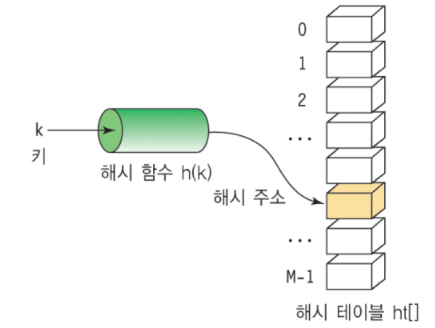

# 해시 값 구하는 법
- 배열의 키 (원소의 값)를 원소 개수로 으로 나눈 나머지로 표현. -> 이것이 해시값이다.

# Hash Table 만들기

In [ ]:
hash_table = [i for i in range(10)]

In [ ]:
def hash_func(key):
    return key % 5

In [ ]:
#Hash Table에 저장하기.
data1 = 'Andy'
data2 = 'Dave'
data3 = 'Trump'
data4 = 'Anthor'

#ord() : 문자의 ASCII(아스키)코드 리턴

print(ord(data1[0]), ord(data2[0]), ord(data3[0]))

65 68 84


In [ ]:
def storage_data(data, value):
    key = ord(data[0])
    hash_value = hash_func(key)
    hash_table[hash_value] = value

storage_data('Andy', '12')
storage_data('Dave', '2')
storage_data('Jason', '52')

In [ ]:
def get_data(data):	# 위 데이터 기준 Andy를 넣으면 된다.
    key = ord(data[0])
    hash_address = hash_func(key)
    return hash_table[hash_address]
get_data(data1)

'12'

# 내가 만든 방법

In [ ]:
arr = list(map(int, input().split()))
arr_ = arr.copy()

5 6 14 20 29 34 37 51 69 75


In [ ]:
idx = [i % len(arr_) for i in arr_]

In [ ]:
#해시 테이블 생성 완료
hash_table = {arr_ : idx for idx, arr_ in zip(arr_, idx)}

In [ ]:
print(len(arr))
print(idx)
print(arr_)

10
[5, 6, 4, 0, 9, 4, 7, 1, 9, 5]
[5, 6, 14, 20, 29, 34, 37, 51, 69, 75]


In [ ]:
for k, v in hash_table.items():
    print(k, v)

5 75
6 6
4 34
0 20
9 69
7 37
1 51


# 해시 충돌
- 만약 여기다가 17을 추가하고 싶으면 17 % 10은 7이므로 arr[7]에 추가하면 되지만, 이미 이곳에 값이 들어가 있으므로, 해시 충돌이 일어난다. 

- 여기서 키와 해시값의 대응 관계는 꼭 1:1일 필요가 없다는 것을 알 수 있다. 키와 해시값은 일반적으로 다 대 1 (N:1)이다.

- 이처럼 저장할 버킷(해시 테이블에서 만들어진 원소를 버킷이라고 함)이 중복되는 현상을 충돌이라고 한다.

In [ ]:
"""
5 75
6 6
4 34
0 20
9 69
7 37
1 51
원래 값은 75였지만, 바꿔서 75가 됨. 즉, python dict 자체기능은 덮어쓰기 때문에 추가 삭제 기능을 사용하고 있지 않다. 
"""

for k, v in hash_table.items():
    print(k, v)

5 17
6 6
4 34
0 20
9 69
7 37
1 51


# 코드 예제

In [ ]:
# 해시테이블의 기본 구조
# 빈 값이 있는 사이즈가 5인 해시테이블을 생성해본다.
hashtable = [None] * 5
print(hashtable)

[None, None, None, None, None]


In [ ]:
def hash_function(key):
    return key % len(hashtable)

print(hash_function(10))
print(hash_function(20))
print(hash_function(31))

0
0
1


In [ ]:
def insert_hash(hashtable, key, value):
    hash_key = hash_function(key)
    hashtable[hash_key] = value

insert_hash(hashtable, 10, 'A')


# 해시 충돌을 해결하기 위한 체인법과 오픈 주소법

- 체인법 : 해시 값이 같은 원소를 연결 리스트로 관리한다.
- 오픈 주소법 : 빈 버킷을 찾을 때까지 해시를 반복한다.

# 체이닝 혹은 체인법 
- 해시 값이 같은 데이터를 체인 모양의 연결 리스트로 연결하는 방법을 말한다. (Open Hasing, 오픈 해시법 이라고도 한다.)

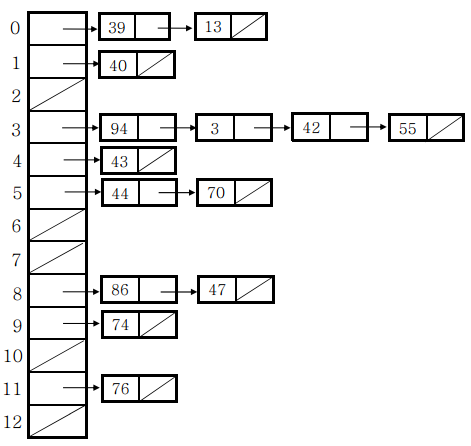


# 해시값이 같은 데이터 저장하기

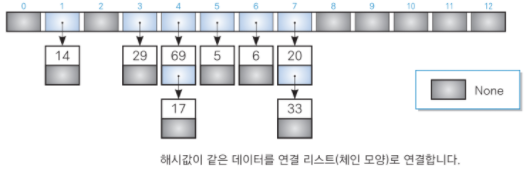

**각 버킷은 '해시값이 같은 노드를 연결한 리스트'의 앞쪽 노드를 참조한다.**

- 체인법에서는 해시값이 같은 데이터를 연결 리스트에 의해 체인 모양으로 연결한다. 배열의 각 버킷(해시 테이블)에 저장하는 것은 인덱스를 해시값으로 하는 연결 리스트의 앞쪽 노드(Head Node)를 참조하는 것이다.

- 예를 들어 69와 17의 해시값은 둘 다 4이며, 이들을 연결하는 연결 리스트의 앞쪽 노드를 참조하여 table[4]에 저장한다. 참고로 해시값 0 이나 2처럼 데이터가 하나도 없는 빈 버킷을 None 값이라고 한다.

    - table[4]는 버킷 69를 참조하는 것이며, 버킷 69의 뒤쪽 포인터는 17을 참조하는 것이다. 또한 버킷 17의 뒤쪽 포인터는 뒤쪽 노드가 존재하지 않음을 알려주는 **None** 이다.

In [ ]:
def get_stars(n):
    matrix = [] #별을 담을 리스트 선언
    for i in range(len(n) * 3): #인자로 전달된 리스트의 길이 * 3만큼 반복(별의 총 줄 개수가 3배씩 늘어나기 때문 ex)3 -> 9 -> 27 ...)
        if i // len(n) == 1: #인자로 전달된 리스트의 길이로 나눈 몫이 1일 경우(즉,별모양에서 중간에 빈칸이 들어가는 경우의 범위)
            matrix.append(n[i % len(n)] + " " * len(n) + n[i % len(n)]) #해당 빈칸의 개수만큼(인자로전달된 리스트의 길이가 빈칸의 개수)별 중간에 추가해준다.
        else:#그 외 경우
            matrix.append(n[i % len(n)] * 3) #리스트에 저장되어있는 별의 개수 * 3배 만큼 추가해준다.(각 줄마다 별의 개수가 3배만큼 증가하기 때문)
    return matrix #별이 저장되어 있는 리스트를 반환


resultStar = ["***", "* *", "***"] # n==3일 때의 별 초기화

n = int(input())
count = 0 #별의 개수를 구하는 함수(get_stars) 반복횟수 구하기

while n != 3: #n이 3이아닐때 반복(3이면 그냥 바로 출력)
    n //= 3 #n을 3으로 나눈 몫을 대입
    count += 1 #한번 나눌때 마다 count값 1씩 증가

for _ in range(count): #count값 만큼 반복(n이 9이상일 때)
    resultStar = get_stars(resultStar) #반복할 때마다 별의 개수가 줄마다 3배씩 늘어나기 때문에 늘어난 별의 개수를 그 전 개수 별의 리스트에 대입해준다.

for j in resultStar: #리스트에 저장되어있는 별을 줄마다 출력
    print(j)

In [ ]:
!pip install big-O-calculator


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
n = int(input())

def star(l):
    if l == 3:
        return ['***','* *','***']

    arr = star(l//3)
    stars = []

    for i in arr:
        stars.append(i*3)

    for i in arr:
        stars.append(i+' '*(l//3)+i)

    for i in arr:
        stars.append(i*3)

    return stars

print('\n'.join(star(n)))

27
***************************
* ** ** ** ** ** ** ** ** *
***************************
***   ******   ******   ***
* *   * ** *   * ** *   * *
***   ******   ******   ***
***************************
* ** ** ** ** ** ** ** ** *
***************************
*********         *********
* ** ** *         * ** ** *
*********         *********
***   ***         ***   ***
* *   * *         * *   * *
***   ***         ***   ***
*********         *********
* ** ** *         * ** ** *
*********         *********
***************************
* ** ** ** ** ** ** ** ** *
***************************
***   ******   ******   ***
* *   * ** *   * ** *   * *
***   ******   ******   ***
***************************
* ** ** ** ** ** ** ** ** *
***************************
